In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import matplotlib.pyplot as plt
import seaborn as sns

!pip install -q holidays
import holidays

!pip install -q meteostat
from meteostat import Point, Daily

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

# **FUNCTIONS**

## **Set Plot Style**

In [5]:
def set_plot_style():
    # Background colors
    plt.figure().patch.set_facecolor("0.85")
    plt.axes().set(facecolor="0.85")
    
    # Hiding grid
    plt.grid(False)
    
    # Setting only left and bottom spines as visible
    ax = plt.gca()
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    # Spines color
    ax.spines['bottom'].set_color("black")
    ax.spines['left'].set_color("black")
    
    # Plot size
    plt.gcf().set_size_inches(6, 5)

## **Scatter Plot**

In [7]:
def PlotScatter(x, y, title, xunit, yunit, x_size):
    set_plot_style()
    
    plt.title(title)
    plt.scatter(x, y, alpha=0.7)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)
    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.16, .98)

    if (x_size == 0):
        plt.gcf().set_size_inches(6, 5)
    else:
        plt.gcf().set_size_inches(x_size, 5)
    plt.show()
    plt.close()

## **IQR Outlier Method**

In [9]:
def IQR_Method(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    
    IQR = Q3 - Q1
    
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    return df[(df[column] >= lower_limit) & (df[column] <= upper_limit)]

## **Regression Plot**

In [11]:
def PlotRegPlot(df_x, df_y, title, xunit, yunit):
    set_plot_style()

    plt.title(title)
    sns.regplot(x = df_x, y = df_y, line_kws={"color": "#31273F"})

    plt.gca().set_ylabel(yunit, fontsize = 10)
    plt.gca().yaxis.set_label_coords(-0.07, .98)

    plt.gca().set_xlabel(xunit, fontsize = 10)
    plt.gca().xaxis.set_label_coords(1.05, -0.025)

    plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])
    #plt.gca().set_xticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_xticks()])

    plt.show()
    plt.close()

## **Line Plot**

In [13]:
def PlotLine(y, title, yunit, x_size, y_size):
  set_plot_style()

  plt.title(title)
  plt.plot(y)

  plt.gca().set_xlabel("", fontsize = 0)
  #plt.gca().xaxis.set_label_coords(1.05, -0.025)
  plt.gca().set_ylabel(yunit, fontsize = 10)
  plt.gca().yaxis.set_label_coords(-0.16, .98)

  #plt.gca().set_yticklabels(['{:,.0f}'.format(x) for x in plt.gca().get_yticks()])

  plt.gcf().set_size_inches(x_size, y_size)

  plt.show()
  plt.close()

# **DATASET LOADING**

In [115]:
df1 = pd.read_csv("../data/raw/Dataset_sell.csv")
df1['sell_date'] = pd.to_datetime(df1['sell_date']).dt.normalize()
df1 = df1[df1['sell_date'] < datetime(2025, 5, 1)]
df1 = df1.rename(columns = {'sell_date': 'date'})
df1 = df1.groupby('date').agg({'sell_quantity': 'sum', 'sell_value': 'mean', 'sell_final_value': 'mean'}).reset_index()
df1['sell_value'] = np.round(df1['sell_value'], 2)
df1['sell_final_value'] = np.round(df1['sell_final_value'], 2)
df1

,date,sell_quantity,sell_value,sell_final_value
0,2024-01-02,280.0,28.97,30.93
1,2024-01-04,240.0,28.43,30.35
2,2024-01-05,240.0,28.43,30.35
3,2024-01-09,240.0,28.43,30.35
4,2024-01-11,240.0,28.43,30.35
...,...,...,...,...
159,2025-04-14,200.0,30.49,32.55
160,2025-04-15,220.0,30.49,32.55
161,2025-04-16,200.0,30.49,32.55
162,2025-04-22,200.0,30.49,32.55


In [113]:
df2 = pd.read_csv("../data/raw/Dataset_buy.csv")
df2['buy_date'] = pd.to_datetime(df2['buy_date']).dt.normalize()
df2 = df2[df2['buy_date'] < datetime(2025, 5, 1)]
df2 = df2.rename(columns = {'buy_date': 'date'})
df2 = df2.groupby('date').agg({'buy_quantity': 'sum', 'buy_value': 'mean'}).reset_index()
df2['buy_value'] = np.round(df2['buy_value'], 2)
df2

,date,buy_quantity,buy_value
0,2024-01-02,163.0,32.10
1,2024-01-03,215.0,31.13
2,2024-01-04,2953.0,34.30
3,2024-01-05,55.0,35.50
4,2024-01-06,2.0,33.50
...,...,...,...
380,2025-04-24,60.0,34.94
381,2025-04-25,142.0,34.92
382,2025-04-28,39.0,35.17
383,2025-04-29,107.0,34.71


In [107]:
i = pd.read_csv("../data/raw/Dataset_inventory.csv")
i

,inventory,date_inventory
0,175.0,2023-12-29
1,252.0,2024-03-18
2,357.0,2024-03-19
3,-43.0,2024-03-27
4,-40.0,2024-05-23
5,144.0,2024-05-28
6,1330.0,2024-08-30
7,82.0,2024-12-30
8,115.0,2025-01-07


In [127]:
df3 = pd.date_range(start ='2024-1-1', end ='2025-04-30', freq ='D')
df3 = pd.DataFrame(df3, columns = ['date_inventory'])
df3 = df3.rename(columns = {'date_inventory': 'date'})
df3['inventory_'] = 0
df3.loc[0, 'inventory_'] = i.loc[0,'inventory']
df3 = df3.merge(df1[['date', 'sell_quantity']], on = 'date', how = 'left').fillna(0)
df3 = df3.merge(df2[['date', 'buy_quantity']], on = 'date', how = 'left').fillna(0)
df3['daily_balance'] = df3['buy_quantity'] - df3['sell_quantity']
df3['inventory'] = df3['daily_balance'].cumsum() + df3.at[0, 'inventory_']
df3 = df3.drop(columns = {'inventory_', 'sell_quantity', 'buy_quantity'}, axis = 1)
df3

,date,daily_balance,inventory
0,2024-01-01,0.0,175.0
1,2024-01-02,-117.0,58.0
2,2024-01-03,215.0,273.0
3,2024-01-04,2713.0,2986.0
4,2024-01-05,-185.0,2801.0
...,...,...,...
481,2025-04-26,0.0,11387.0
482,2025-04-27,0.0,11387.0
483,2025-04-28,39.0,11426.0
484,2025-04-29,107.0,11533.0


# **APIs LOADING**

## **OPEN WEATHER**

In [33]:
city = Point(-22.31553, -49.070822)
start_date = datetime(2024, 1, 1)
end_date = datetime(2025, 5, 8)

weather_df = Daily(city, start_date, end_date)
weather_df = weather_df.fetch()[['tavg', 'prcp']]
weather_df = weather_df.rename_axis('date').reset_index()
weather_df = weather_df.rename(columns = {'tavg': 'avg_temperature', 'prcp': 'precipitation'})
weather_df = weather_df[weather_df['date'] < datetime(2025, 5, 1)]

In [35]:
weather_df

,date,avg_temperature,precipitation
0,2024-01-01,26.1,0.1
1,2024-01-02,26.2,0.2
2,2024-01-03,26.2,5.2
3,2024-01-04,26.5,0.0
4,2024-01-05,26.5,0.0
...,...,...,...
481,2025-04-26,23.5,1.6
482,2025-04-27,23.8,0.1
483,2025-04-28,23.4,7.6
484,2025-04-29,22.4,0.3


In [37]:
weather_df.to_csv('../data/raw/weather_data.csv')

## **HOLIDAYS**

In [39]:
holidays_df = weather_df[['date']].copy()

holidays_df['is_holiday'] = holidays_df['date'].apply(lambda x: 1 if x in holidays.Brazil(state='SP') else 0)
holidays_df['holiday_name'] = holidays_df['date'].apply(lambda x: holidays.Brazil(state='SP').get(x) if x in holidays.Brazil(state='SP') else 'None')

holidays_df = holidays_df[holidays_df['date'] < datetime(2025, 5, 1)]

In [41]:
holidays_df

,date,is_holiday,holiday_name
0,2024-01-01,1,Confraternização Universal
1,2024-01-02,0,None
2,2024-01-03,0,None
3,2024-01-04,0,None
4,2024-01-05,0,None
...,...,...,...
481,2025-04-26,0,None
482,2025-04-27,0,None
483,2025-04-28,0,None
484,2025-04-29,0,None


In [43]:
holidays_df.to_csv('../data/raw/holidays_data.csv')

## **INFLATION**

In [46]:
url = "https://api.bcb.gov.br/dados/serie/bcdata.sgs.433/dados?formato=json"
ipca_df = pd.DataFrame(requests.get(url).json())

ipca_df = ipca_df.rename(columns = {'data': 'date', 'valor': 'ipca'})

i = [["01/05/2025", np.nan]]
i = pd.DataFrame(i, columns = ['date', 'ipca'])
ipca_df = pd.concat([ipca_df, i], ignore_index=True)
ipca_df['date'] = pd.to_datetime(ipca_df['date'], dayfirst = True)
ipca_df = ipca_df[ipca_df['date'] >= datetime(2024, 1, 1)].copy()
ipca_df = ipca_df.set_index('date')

ipca_df = ipca_df.asfreq('D', method='ffill')
ipca_df = ipca_df.rename_axis('date').reset_index()
ipca_df = ipca_df[ipca_df['date'] < datetime(2025, 5, 1)].copy()

In [48]:
ipca_df

,date,ipca
0,2024-01-01,0.42
1,2024-01-02,0.42
2,2024-01-03,0.42
3,2024-01-04,0.42
4,2024-01-05,0.42
...,...,...
481,2025-04-26,0.43
482,2025-04-27,0.43
483,2025-04-28,0.43
484,2025-04-29,0.43


In [50]:
ipca_df.to_csv('../data/raw/inflation_data.csv')

# **DATA CLEANING, PROCESSING, AND CONSOLIDATION**

## **DEALING WITH MISSING DATA**

In [29]:
df1.isna().sum()

date        0
quantity    0
value       0
product     0
dtype: int64

In [30]:
df2.isna().sum()

date           0
quantity       0
value          0
final_value    0
product        0
dtype: int64

## **OUTLIERS**

### **DF1**

In [33]:
df1.describe(include = ['float', 'int'])

,quantity,value
count,3321.000000,3321.000000
mean,17.163204,34.383490
std,84.220504,6.241529
min,1.000000,0.010000
25%,5.000000,33.700000
50%,10.000000,34.900000
75%,20.000000,36.000000
max,2748.000000,44.500000


#### **Quantity**

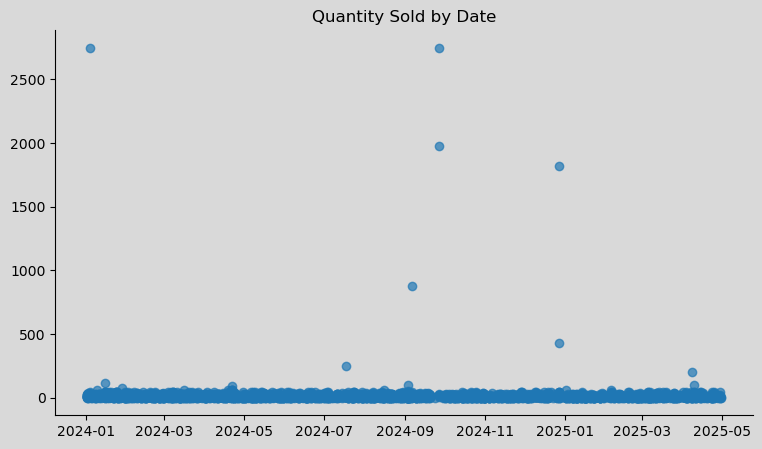

In [35]:
PlotScatter(df1['date'], df1['quantity'], "Quantity Sold by Date", "", "", 9)

In [36]:
df1 = IQR_Method(df1, 'quantity')

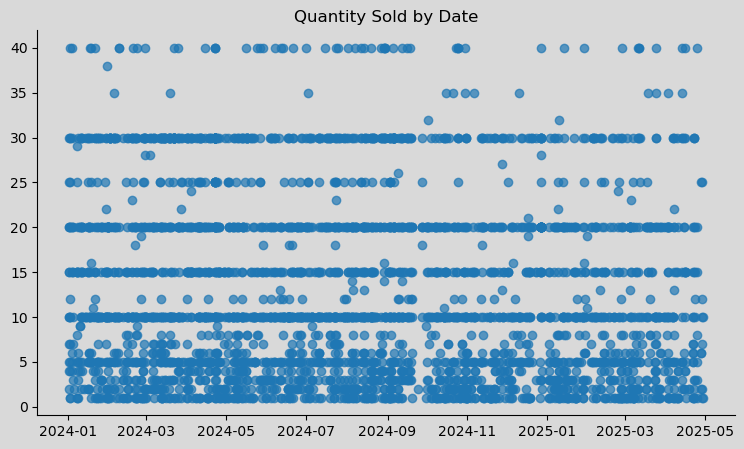

In [37]:
PlotScatter(df1['date'], df1['quantity'], "Quantity Sold by Date", "", "", 9)

#### **Value**

In [39]:
df1[df1['value'] < 30]['value'].value_counts()

value
0.01     78
29.90    16
29.99     3
29.00     3
Name: count, dtype: int64

In [40]:
df1 = df1[df1['value'] > 28.99]

In [41]:
df1.describe(include = ['float', 'int'])

,quantity,value
count,3117.000000,3117.000000
mean,12.203080,35.384735
std,9.824919,2.386066
min,1.000000,29.000000
25%,4.000000,33.900000
50%,10.000000,34.900000
75%,20.000000,36.500000
max,40.000000,44.500000


### **DF2**

In [43]:
df2.describe(include = ['float', 'int'])

,quantity,value,final_value
count,188.000000,188.000000,188.000000
mean,242.712766,28.418511,30.338777
std,61.906886,1.483465,1.583863
min,12.000000,23.430000,25.010000
25%,240.000000,27.790000,29.670000
50%,280.000000,28.300000,30.210000
75%,280.000000,28.950000,30.910000
max,400.000000,34.700000,37.050000


## **DATA CONSOLIDATION**

### **DF1**

In [46]:
df1 = df1.drop('product', axis = 1)
df1.head()

,date,quantity,value
0,2024-01-02,30.0,34.5
1,2024-01-02,4.0,40.6
2,2024-01-02,2.0,34.9
3,2024-01-02,10.0,34.9
4,2024-01-02,15.0,34.5


In [47]:
i = {'quantity':'sell_quantity', 'value':'sell_value'}
df1_agg = df1.groupby('date').agg({'quantity': 'sum', 'value': 'mean'}).rename(columns = i)
df1_agg = df1_agg.astype({'sell_quantity':'int64'})
df1_agg['sell_value'] = np.round(df1_agg['sell_value'], decimals = 2)
df1_agg

,sell_quantity,sell_value
date,,
2024-01-02,143,35.02
2024-01-03,202,36.32
2024-01-04,155,34.33
2024-01-05,55,35.50
2024-01-06,2,33.50
...,...,...
2025-04-24,60,34.94
2025-04-25,92,34.64
2025-04-28,39,35.17


### **DF2**

In [49]:
df2 = df2.drop('product', axis = 1)
df2.head()

,date,quantity,value,final_value
0,2024-01-02,280.0,28.97,30.93
1,2024-01-04,240.0,28.43,30.35
2,2024-01-05,240.0,28.43,30.35
3,2024-01-09,240.0,28.43,30.35
4,2024-01-11,240.0,28.43,30.35


In [50]:
i = {'quantity':'buy_quantity', 'value':'buy_value','final_value':'buy_final_value'}
df2_agg = df2.groupby('date').agg({'quantity': 'sum', 'value': 'mean', 'final_value': 'mean'}).rename(columns = i)
df2_agg = df2_agg.astype({'buy_quantity':'int64'})
df2_agg['buy_value'] = np.round(df2_agg['buy_value'], decimals = 2)
df2_agg['buy_final_value'] = np.round(df2_agg['buy_final_value'], decimals = 2)
df2_agg

,buy_quantity,buy_value,buy_final_value
date,,,
2024-01-02,280,28.97,30.93
2024-01-04,240,28.43,30.35
2024-01-05,240,28.43,30.35
2024-01-09,240,28.43,30.35
2024-01-11,240,28.43,30.35
...,...,...,...
2025-04-14,200,30.49,32.55
2025-04-15,220,30.49,32.55
2025-04-16,200,30.49,32.55


### **CONSOLIDATE DATAFRAME**

In [52]:
df = pd.date_range(start = '2024-01-01', end = '2025-04-30', freq = 'D')
df = pd.DataFrame({'date': df})

df = df.merge(df1_agg, on = 'date', how = 'left') \
        .merge(df2_agg, on = 'date', how = 'left') \
        .merge(weather_df, on = 'date', how = 'left') \
        .merge(ipca_df, on = 'date', how = 'left') \
        .merge(holidays_df, on = 'date', how = 'left')

In [53]:
df

,date,sell_quantity,sell_value,buy_quantity,buy_value,buy_final_value,avg_temperature,precipitation,ipca,is_holiday,holiday_name
0,2024-01-01,NaN,NaN,NaN,NaN,NaN,26.1,0.1,0.42,1,Confraternização Universal
1,2024-01-02,143.0,35.02,280.0,28.97,30.93,26.2,0.2,0.42,0,None
2,2024-01-03,202.0,36.32,NaN,NaN,NaN,26.2,5.2,0.42,0,None
3,2024-01-04,155.0,34.33,240.0,28.43,30.35,26.5,0.0,0.42,0,None
4,2024-01-05,55.0,35.50,240.0,28.43,30.35,26.5,0.0,0.42,0,None
...,...,...,...,...,...,...,...,...,...,...,...
481,2025-04-26,NaN,NaN,NaN,NaN,NaN,23.5,1.6,0.43,0,None
482,2025-04-27,NaN,NaN,NaN,NaN,NaN,23.8,0.1,0.43,0,None
483,2025-04-28,39.0,35.17,NaN,NaN,NaN,23.4,7.6,0.43,0,None
484,2025-04-29,57.0,34.85,NaN,NaN,NaN,22.4,0.3,0.43,0,None


In [54]:
df = df.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 486 entries, 0 to 485
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             486 non-null    datetime64[ns]
 1   sell_quantity    486 non-null    float64       
 2   sell_value       486 non-null    float64       
 3   buy_quantity     486 non-null    float64       
 4   buy_value        486 non-null    float64       
 5   buy_final_value  486 non-null    float64       
 6   avg_temperature  486 non-null    float64       
 7   precipitation    486 non-null    float64       
 8   ipca             486 non-null    object        
 9   is_holiday       486 non-null    int64         
 10  holiday_name     486 non-null    object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(2)
memory usage: 41.9+ KB


In [55]:
df = df.astype({'sell_quantity':'int64', 'buy_quantity':'int64'})
df

,date,sell_quantity,sell_value,buy_quantity,buy_value,buy_final_value,avg_temperature,precipitation,ipca,is_holiday,holiday_name
0,2024-01-01,0,0.00,0,0.00,0.00,26.1,0.1,0.42,1,Confraternização Universal
1,2024-01-02,143,35.02,280,28.97,30.93,26.2,0.2,0.42,0,None
2,2024-01-03,202,36.32,0,0.00,0.00,26.2,5.2,0.42,0,None
3,2024-01-04,155,34.33,240,28.43,30.35,26.5,0.0,0.42,0,None
4,2024-01-05,55,35.50,240,28.43,30.35,26.5,0.0,0.42,0,None
...,...,...,...,...,...,...,...,...,...,...,...
481,2025-04-26,0,0.00,0,0.00,0.00,23.5,1.6,0.43,0,None
482,2025-04-27,0,0.00,0,0.00,0.00,23.8,0.1,0.43,0,None
483,2025-04-28,39,35.17,0,0.00,0.00,23.4,7.6,0.43,0,None
484,2025-04-29,57,34.85,0,0.00,0.00,22.4,0.3,0.43,0,None


# **SAVING PROCESSED DATASET**

In [97]:
df.to_csv('../data/processed/01_Data_Cleaning.csv', index = False)